## Importing Libraries

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
pima=pd.read_csv('diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for missing data

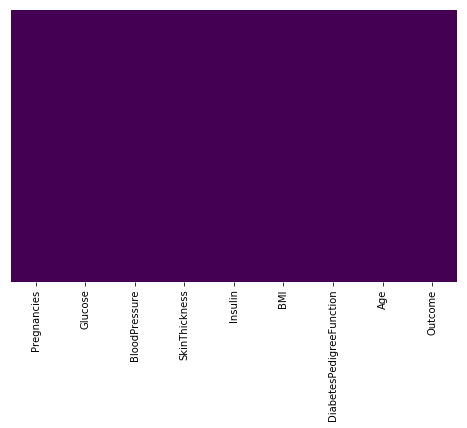

In [4]:
plt.figure(figsize=(8,5 ))
sns.heatmap(pima.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Checking the values of target variable / Data Imbalance

In [5]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

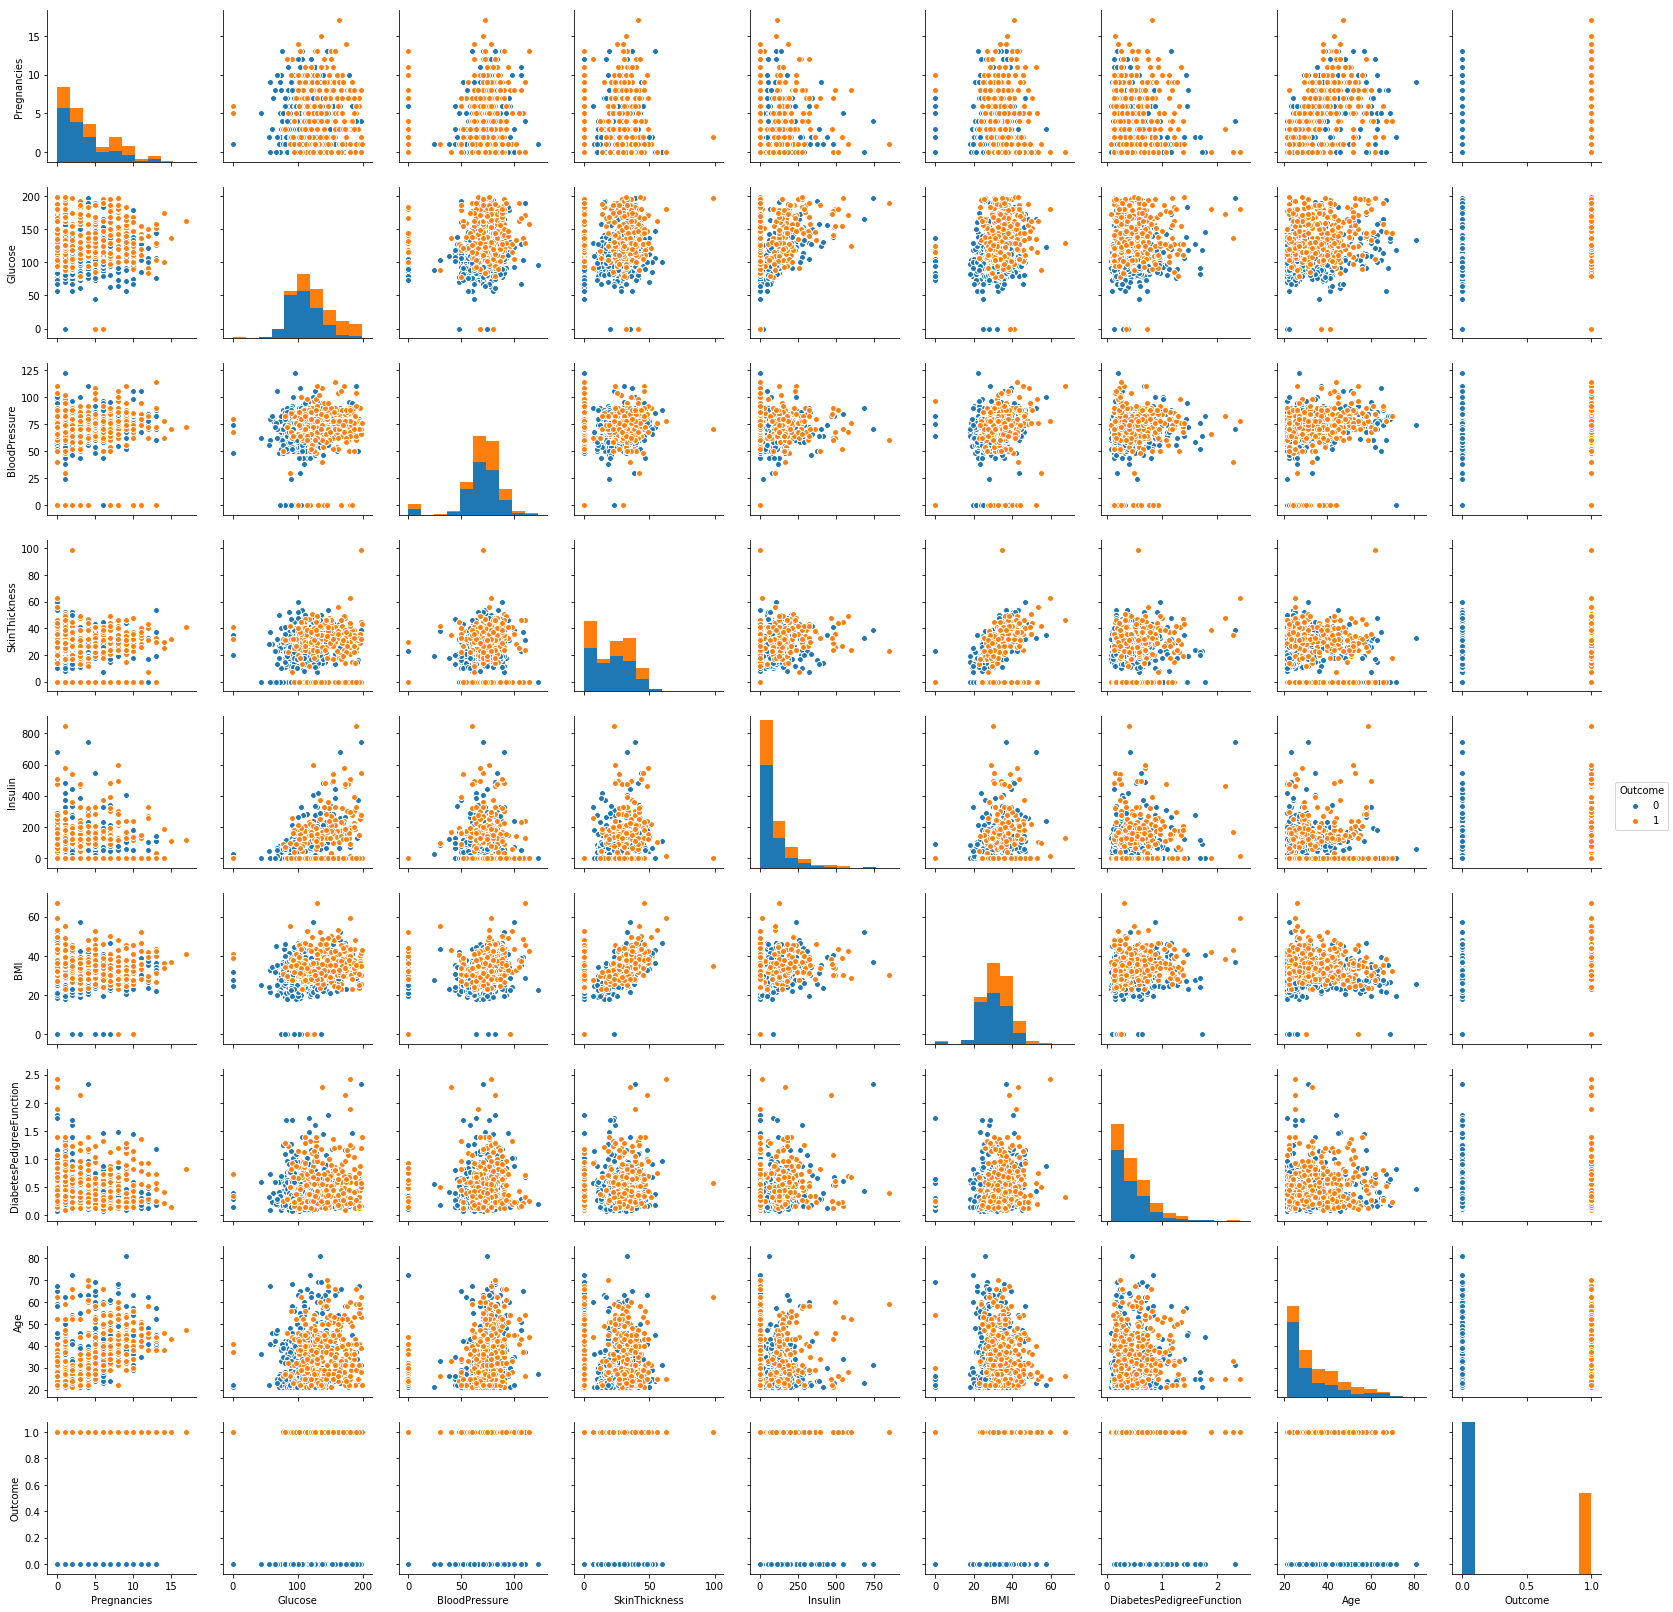

In [6]:
sns.pairplot(pima,hue='Outcome')

In [7]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


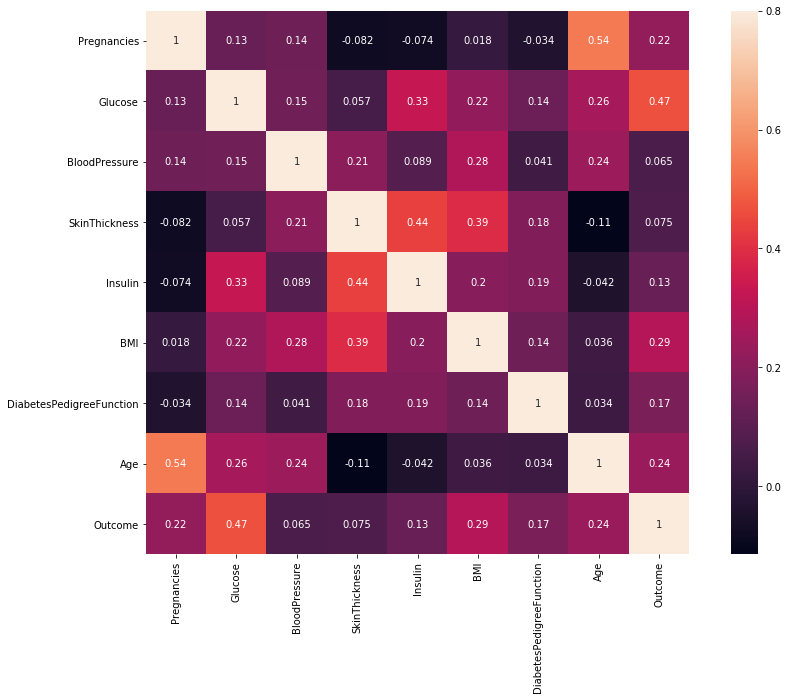

In [8]:
corrmat= pima.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot= True)

In [9]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

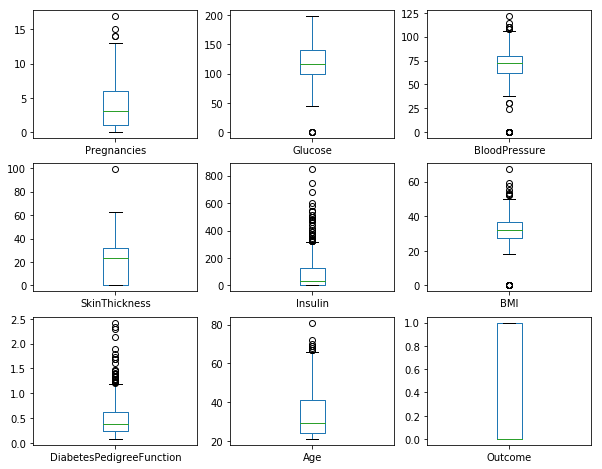

In [10]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))


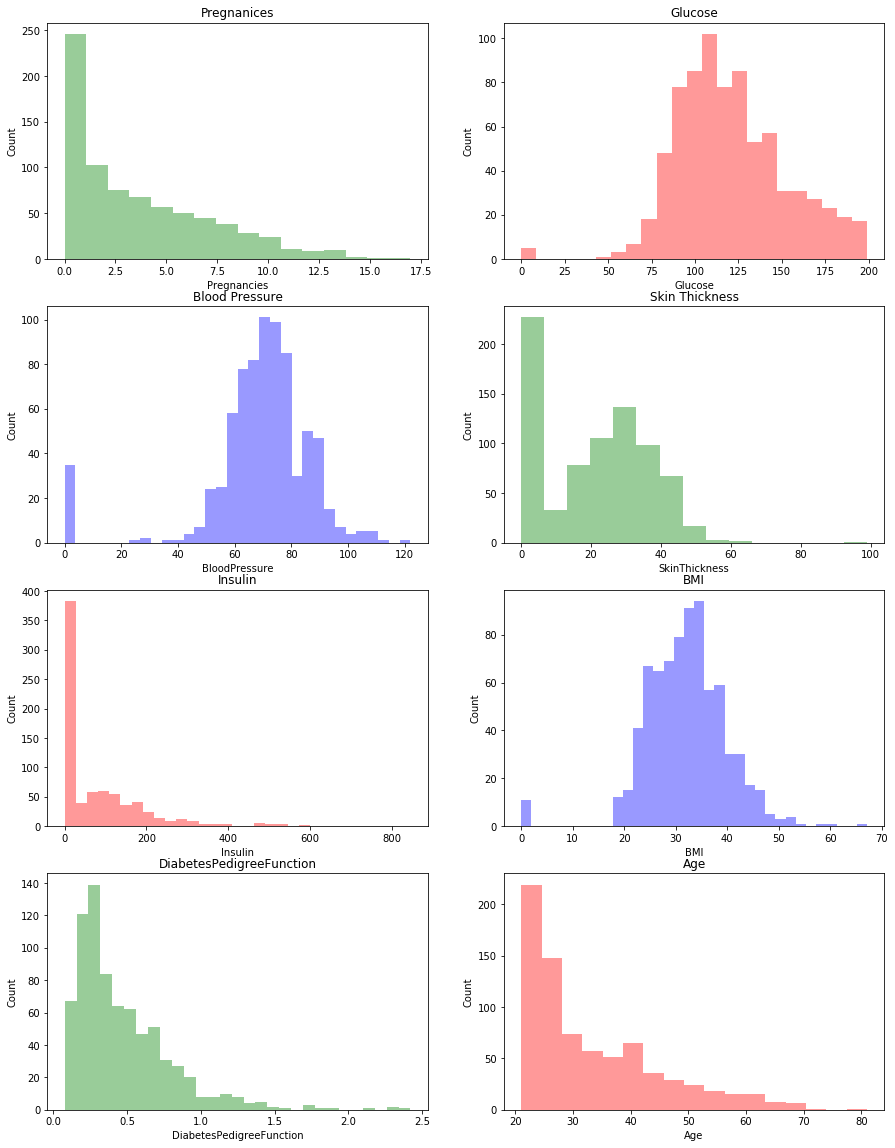

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=4,ncols=2, figsize=(15, 20))

# Graph pregnancies
sns.distplot(pima.Pregnancies, kde=False, color="g", ax=axes[0][0]).set_title('Pregnanices')
axes[0][0].set_ylabel('Count')

# Graph Glucose
sns.distplot(pima.Glucose, kde=False, color="r", ax=axes[0][1]).set_title('Glucose')
axes[0][1].set_ylabel('Count')

# Graph Blood Pressure
sns.distplot(pima.BloodPressure, kde=False, color="b", ax=axes[1][0]).set_title('Blood Pressure')
axes[1][0].set_ylabel('Count')

# Graph Skin Thickness
sns.distplot(pima.SkinThickness, kde=False, color="g", ax=axes[1][1]).set_title('Skin Thickness')
axes[1][1].set_ylabel('Count')

# Graph Insulin
sns.distplot(pima.Insulin, kde=False, color="r", ax=axes[2][0]).set_title('Insulin')
axes[2][0].set_ylabel('Count')

# Graph BMI
sns.distplot(pima.BMI, kde=False, color="b", ax=axes[2][1]).set_title('BMI')
axes[2][1].set_ylabel('Count')

# Graph Diabetes Pedigree function
sns.distplot(pima.DiabetesPedigreeFunction, kde=False, color="g", ax=axes[3][0]).set_title('DiabetesPedigreeFunction')
axes[3][0].set_ylabel('Count')

# Graph Age
sns.distplot(pima.Age, kde=False, color="r", ax=axes[3][1]).set_title('Age')
axes[3][1].set_ylabel('Count')


In [12]:
#Removing outliers 
pima_new=pima

In [13]:
pima_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### I have removed outliers for most correlated feratures as per the correlation matrix to avoid data loss 

In [14]:
# Removing Outliers in the data based on Box Plots 
pima_new = pima_new[pima_new["Pregnancies"] <13]
pima_new = pima_new[(pima_new["Glucose"] > 30)]
#pima_new = pima_new[(pima_new['BloodPressure'] > 26) & (pima_new['BloodPressure'] <105) ]
#pima_new = pima_new[pima_new['Insulin'] < 300]
pima_new = pima_new[pima_new['BMI'] > 10]  
pima_new =pima_new[pima_new['BMI'] <50]
pima_new = pima_new[pima_new['DiabetesPedigreeFunction'] < 1.2]
pima_new = pima_new[pima_new['Age'] < 65]

Pregnancies                    Axes(0.125,0.657941;0.227941x0.222059)
Glucose                     Axes(0.398529,0.657941;0.227941x0.222059)
BloodPressure               Axes(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  Axes(0.125,0.391471;0.227941x0.222059)
Insulin                     Axes(0.398529,0.391471;0.227941x0.222059)
BMI                         Axes(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          Axes(0.125,0.125;0.227941x0.222059)
Age                            Axes(0.398529,0.125;0.227941x0.222059)
Outcome                        Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

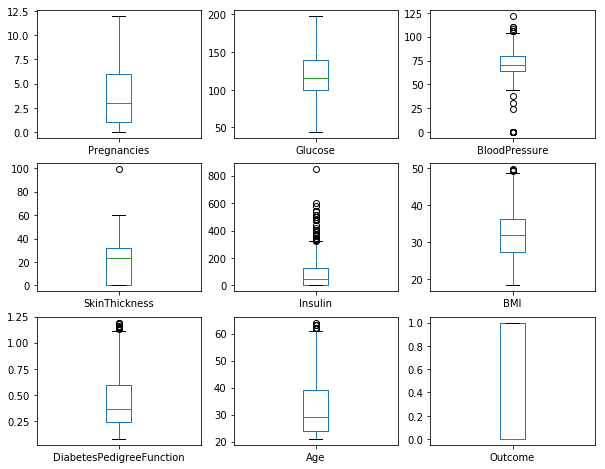

In [15]:
pima_new.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

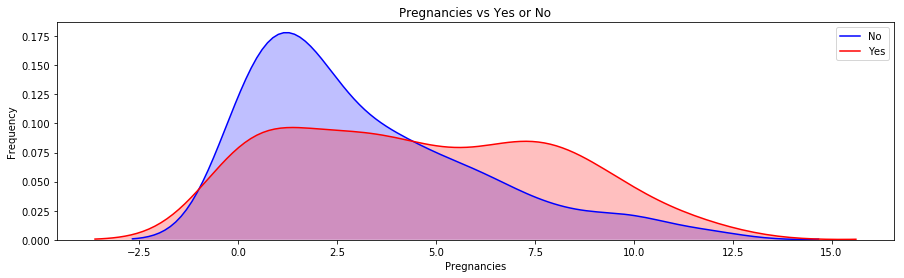

In [16]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Pregnancies'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Pregnancies'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Pregnancies', ylabel='Frequency')
plt.title('Pregnancies vs Yes or No')

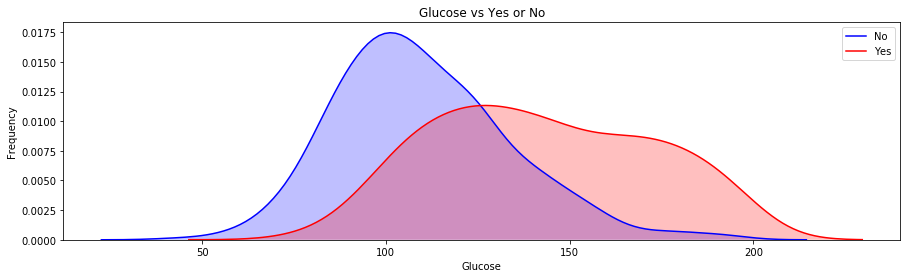

In [17]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Glucose'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Glucose'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Glucose', ylabel='Frequency')
plt.title('Glucose vs Yes or No')

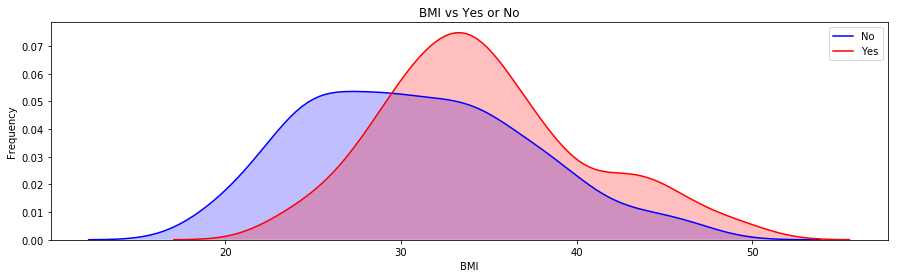

In [18]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'BMI'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'BMI'] , color='r',shade=True, label='Yes')
ax.set(xlabel='BMI', ylabel='Frequency')
plt.title('BMI vs Yes or No')

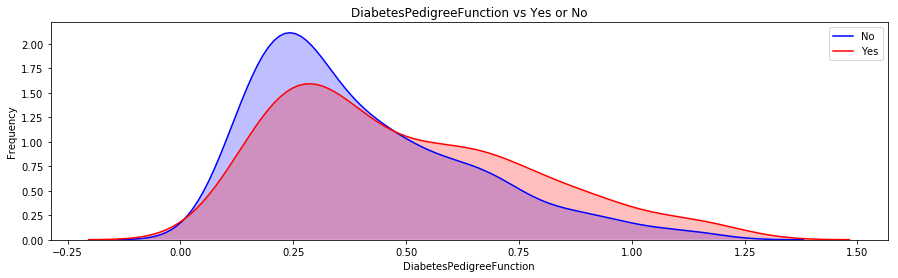

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'DiabetesPedigreeFunction'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'DiabetesPedigreeFunction'] , color='r',shade=True, label='Yes')
ax.set(xlabel='DiabetesPedigreeFunction', ylabel='Frequency')
plt.title('DiabetesPedigreeFunction vs Yes or No')

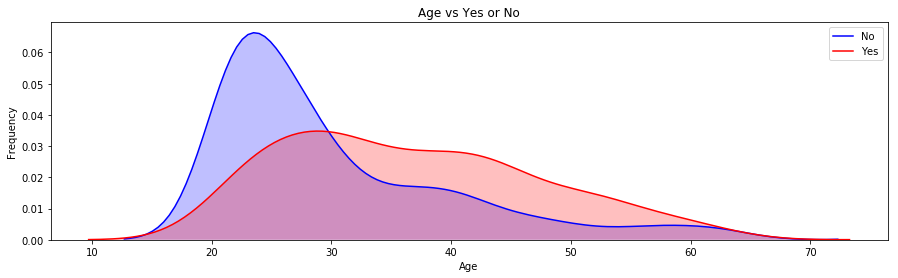

In [20]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Age'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Age'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age vs Yes or No')

# Lets begin the prediction

# Using machine learning models which are not robust to outliers

In [120]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pima_new.drop('Outcome',axis=1), 
                                                    pima_new['Outcome'], test_size=0.30, 
                                                    random_state=123)

In [121]:
#Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

## Defining a cross validation function

In [122]:
# Cross Validation function
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Defining a Cross validation function
#n_folds = 10
def classification_cv(model):
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model, X_train_transformed, y_train, cv=kfold, scoring=scoring)
    return(print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())))

## Feature selection using Decision tree classifier

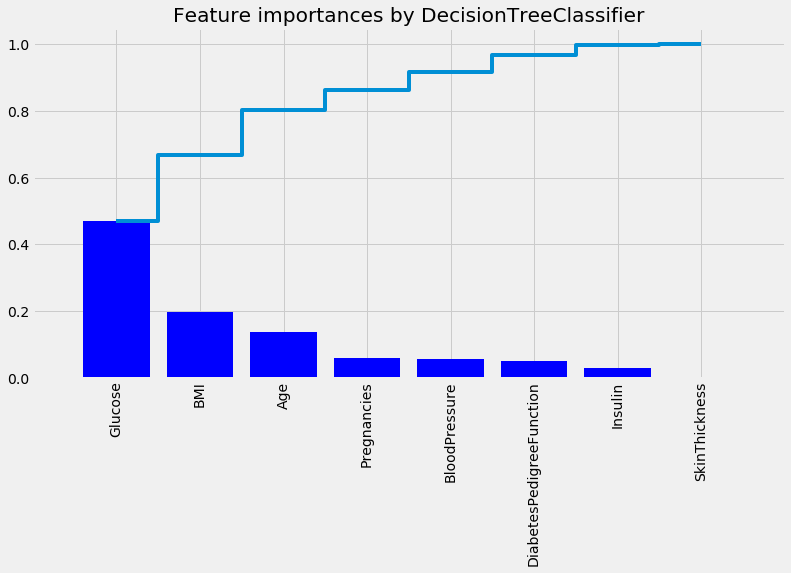

In [123]:
#Feature importance
#decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train_transformed,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = pima_new.drop(['Outcome'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='blue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## Base rate model

In [25]:
# Creating base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [26]:
# Check accuracy of base rate model-- same as percentage of majority class
y_base_rate = base_rate_model(X_test_transformed)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.65


In [227]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, y_base_rate)
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, y_base_rate))
print ("---Confusion Matrix---")
print(confusion_matrix(y_test, y_base_rate))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.65      1.00      0.79       134
          1       0.00      0.00      0.00        73

avg / total       0.42      0.65      0.51       207

---Confusion Matrix---
[[134   0]
 [ 73   0]]


## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(penalty='l2', C=0.3,class_weight = "balanced")

In [125]:
#Cross validation Holdout method for learning
Logistic_regression_cv=classification_cv(logis)
Logistic_regression_cv

Accuracy: 0.785 (0.047)


In [126]:
logis.fit(X_train_transformed, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test_transformed))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test_transformed)))
print(confusion_matrix(y_test, logis.predict(X_test_transformed)))
print ("Logistic regression accuracy is %2.2f" % accuracy_score(y_test, logis.predict(X_test_transformed) ))



 ---Logistic Model---
Logistic AUC = 0.73
             precision    recall  f1-score   support

          0       0.82      0.76      0.79       134
          1       0.61      0.70      0.65        73

avg / total       0.75      0.74      0.74       207

[[102  32]
 [ 22  51]]
Logistic regression accuracy is 0.74


## Decision Tree Model

In [127]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [128]:
# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,9):
    dtree = tree.DecisionTreeClassifier(max_depth=i,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=dtree, X=X_train_transformed, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.674990865911582), (4, 0.7144536075299686), (5, 0.6915548828226943), (6, 0.7167954138177011), (7, 0.7042799728587087), (8, 0.7083903126467979)]


In [129]:
dtree = tree.DecisionTreeClassifier(max_depth=4,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)
dtree.fit(X_train_transformed, y_train)
print ("\n\n ---Decision Tree  Model---")
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test_transformed))
print ("Decision tree AUC = %2.2f" % dtree_roc_auc)
print(classification_report(y_test, dtree.predict(X_test_transformed)))
print(confusion_matrix(y_test, dtree.predict(X_test_transformed)))
print ("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test_transformed) ))



 ---Decision Tree  Model---
Decision tree AUC = 0.73
             precision    recall  f1-score   support

          0       0.86      0.66      0.75       134
          1       0.56      0.79      0.66        73

avg / total       0.75      0.71      0.72       207

[[89 45]
 [15 58]]
Decision Tree accuracy is 0.71


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=6, 
    min_samples_split=10, 
    class_weight="balanced",
    random_state=100
    )

In [141]:
classification_cv(rf)

Accuracy: 0.773 (0.063)


In [142]:
rf.fit(X_train_transformed, y_train)
print ("\n\n ---Random Forest  Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_transformed))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_transformed)))
print(confusion_matrix(y_test, rf.predict(X_test_transformed)))
print ("Random Forest is %2.2f" % accuracy_score(y_test, rf.predict(X_test_transformed) ))



 ---Random Forest  Model---
Random Forest AUC = 0.74
             precision    recall  f1-score   support

          0       0.82      0.80      0.81       134
          1       0.65      0.68      0.67        73

avg / total       0.76      0.76      0.76       207

[[107  27]
 [ 23  50]]
Random Forest is 0.76


## ADA Boosting

In [153]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4),n_estimators=400, learning_rate=0.1,random_state=100)


In [154]:
classification_cv(ada)

Accuracy: 0.775 (0.053)


In [158]:
# evaluation ADA boost
ada.fit(X_train_transformed, y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test_transformed))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test_transformed)))
confusion_matrix(y_test, ada.predict(X_test_transformed))
print(confusion_matrix(y_test, ada.predict(X_test_transformed)))
print ("ADA boost is %2.2f" % accuracy_score(y_test, ada.predict(X_test_transformed)))



 ---AdaBoost Model---
AdaBoost AUC = 0.70
             precision    recall  f1-score   support

          0       0.77      0.87      0.82       134
          1       0.69      0.52      0.59        73

avg / total       0.74      0.75      0.74       207

[[117  17]
 [ 35  38]]
ADA boost is 0.75


## Support Vector Machines (SVM)

In [81]:
from sklearn.svm import SVC

In [181]:
clf = SVC(kernel="linear", C=0.35, probability=True, random_state=100)

In [179]:
classification_cv(clf)

Accuracy: 0.796 (0.049)


In [182]:
clf.fit(X_train_transformed, y_train)
print ("\n\n ---SVM---")
svc_roc_auc = roc_auc_score(y_test, clf.predict(X_test_transformed))
print ("SVM AUC = %2.2f" % svc_roc_auc)
print(classification_report(y_test, clf.predict(X_test_transformed)))
print(confusion_matrix(y_test, clf.predict(X_test_transformed)))
print ("SVM accuracy is %2.2f" % accuracy_score(y_test, clf.predict(X_test_transformed) ))



 ---SVM---
SVM AUC = 0.69
             precision    recall  f1-score   support

          0       0.77      0.88      0.82       134
          1       0.70      0.51      0.59        73

avg / total       0.74      0.75      0.74       207

[[118  16]
 [ 36  37]]
SVM accuracy is 0.75


## Gradient Boosting Classifier

In [215]:
# Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,random_state=100,max_features=4 )

In [212]:
gbc.fit(X_train_transformed, y_train)
print ("\n\n ---GBC---")
gbc_roc_auc = roc_auc_score(y_test, gbc.predict(X_test_transformed))
print ("GBC AUC = %2.2f" % gbc_roc_auc)
print(classification_report(y_test, gbc.predict(X_test_transformed)))
print(confusion_matrix(y_test, gbc.predict(X_test_transformed)))
print ("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(X_test_transformed) ))



 ---GBC---
GBC AUC = 0.68
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       134
          1       0.68      0.49      0.57        73

avg / total       0.73      0.74      0.73       207

[[117  17]
 [ 37  36]]
GBC accuracy is 0.74


## Ensembling SVM and Logistic Regression

In [161]:
from sklearn.ensemble import VotingClassifier

In [200]:
eclf = VotingClassifier(estimators=[('lr', logis), ('svc', clf),('tree',dtree)], voting='soft', weights=[1,1,1])

In [201]:
eclf.fit(X_train_transformed, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.3, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)), ('svc', ...     min_weight_fraction_leaf=0.01, presort=False,
            random_state=None, splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 1])

In [226]:
print ("\n\n ---ECLF---")
eclf_roc_auc = roc_auc_score(y_test, eclf.predict(X_test_transformed))
print ("ECLF AUC = %2.2f" % eclf_roc_auc)
print(classification_report(y_test, eclf.predict(X_test_transformed)))
print(confusion_matrix(y_test, eclf.predict(X_test_transformed)))
print ("ECLF accuracy is %2.2f" % accuracy_score(y_test, eclf.predict(X_test_transformed) ))



 ---ECLF---
ECLF AUC = 0.71
             precision    recall  f1-score   support

          0       0.80      0.81      0.80       134
          1       0.64      0.62      0.63        73

avg / total       0.74      0.74      0.74       207

[[109  25]
 [ 28  45]]
ECLF accuracy is 0.74


## ROC graph for all the models

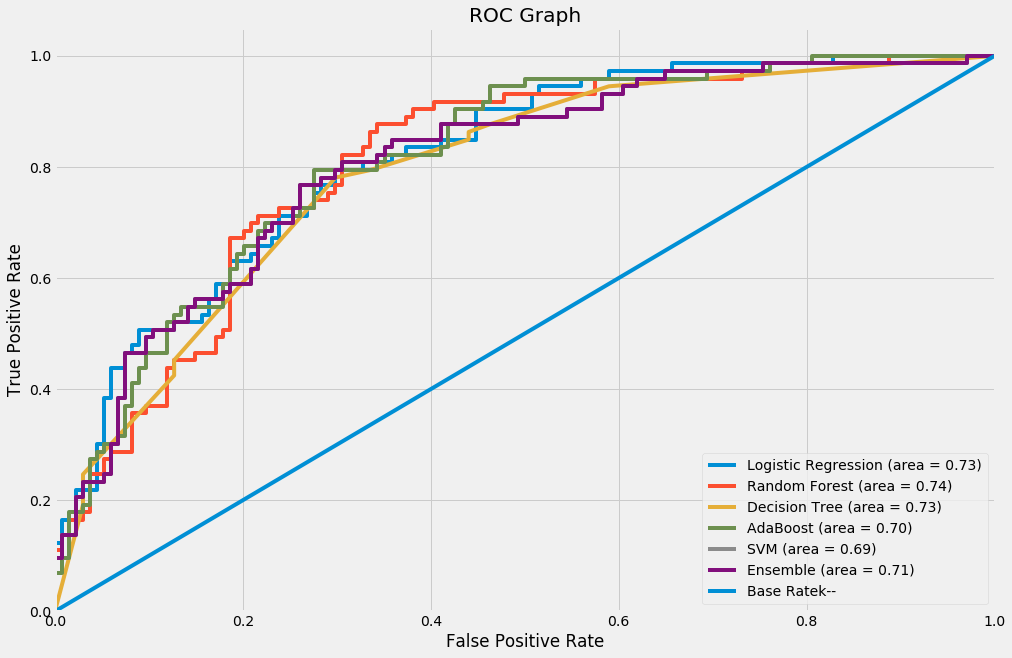

In [203]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test_transformed)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_transformed)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test_transformed)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test_transformed)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, clf.predict_proba(X_test_transformed)[:,1])
eclf_fpr, eclf_tpr, eclf_thresholds = roc_curve(y_test, eclf.predict_proba(X_test_transformed)[:,1])



plt.figure(figsize=(15, 10))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot SVM classifier ROC
plt.plot(gbc_fpr, gbc_tpr, label='SVM (area = %0.2f)' % svc_roc_auc)

# Plot Ensemble classifier ROC
plt.plot(gbc_fpr, gbc_tpr, label='Ensemble (area = %0.2f)' % eclf_roc_auc)



# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Using original data without outliers removal

In [194]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [204]:
# Train test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(pima.drop('Outcome',axis=1), 
                                                    pima['Outcome'], test_size=0.30, 
                                                    random_state=123)

## Using ML model robust to outliers

## Random Forest

In [206]:
# Cross validation function
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train_1, y_train_1, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.747 (0.052)


In [207]:
rf.fit(X_train_1, y_train_1)
print ("\n\n ---Random Forest  Model---")
rf_roc_auc = roc_auc_score(y_test_1, rf.predict(X_test_1))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test_1, rf.predict(X_test_1)))
print(confusion_matrix(y_test_1, rf.predict(X_test_1)))
print ("Random Forest is %2.2f" % accuracy_score(y_test_1, rf.predict(X_test_1) ))



 ---Random Forest  Model---
Random Forest AUC = 0.79
             precision    recall  f1-score   support

          0       0.87      0.77      0.81       143
          1       0.68      0.81      0.74        88

avg / total       0.80      0.78      0.79       231

[[110  33]
 [ 17  71]]
Random Forest is 0.78


## Gradient Boosting Classifier

In [216]:
# Cross validation function
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbc, X_train_1, y_train_1, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.738 (0.048)


In [217]:
gbc.fit(X_train_1, y_train_1)
print ("\n\n ---Gradient Boosting Model---")
gbc_roc_auc = roc_auc_score(y_test_1, gbc.predict(X_test_1))
print ("Gradient Boosting AUC = %2.2f" % gbc_roc_auc)
print(classification_report(y_test_1, gbc.predict(X_test_1)))
print(confusion_matrix(y_test_1, gbc.predict(X_test_1)))
print ("Gradient Boosting Accuracy is %2.2f" % accuracy_score(y_test_1, gbc.predict(X_test_1) ))



 ---Gradient Boosting Model---
Gradient Boosting AUC = 0.78
             precision    recall  f1-score   support

          0       0.85      0.80      0.82       143
          1       0.71      0.76      0.73        88

avg / total       0.79      0.79      0.79       231

[[115  28]
 [ 21  67]]
Gradient Boosting is 0.79


## Ensembling Gradient boosting and Random forest model to acheive 80% accuracy

In [220]:
eclf_1 = VotingClassifier(estimators=[('rf', rf), ('gbc', gbc)], voting='soft', weights=[1,2])
eclf_1.fit(X_train_1, y_train_1)


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, mi...       presort='auto', random_state=100, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[1, 2])

In [225]:
print ("\n\n ---Ensembled Gradient Boost and Random Forest---")
eclf_1_roc_auc = roc_auc_score(y_test_1, eclf_1.predict(X_test_1))
print (" AUC = %2.2f" % eclf_1_roc_auc)
print(classification_report(y_test_1, eclf_1.predict(X_test_1)))
print(confusion_matrix(y_test_1, eclf_1.predict(X_test_1)))
print (" accuracy is %2.2f" % accuracy_score(y_test_1, eclf_1.predict(X_test_1) ))



 ---Ensembled Gradient Boost and Random Forest---
 AUC = 0.79
             precision    recall  f1-score   support

          0       0.85      0.81      0.83       143
          1       0.72      0.77      0.74        88

avg / total       0.80      0.80      0.80       231

[[116  27]
 [ 20  68]]
 accuracy is 0.80


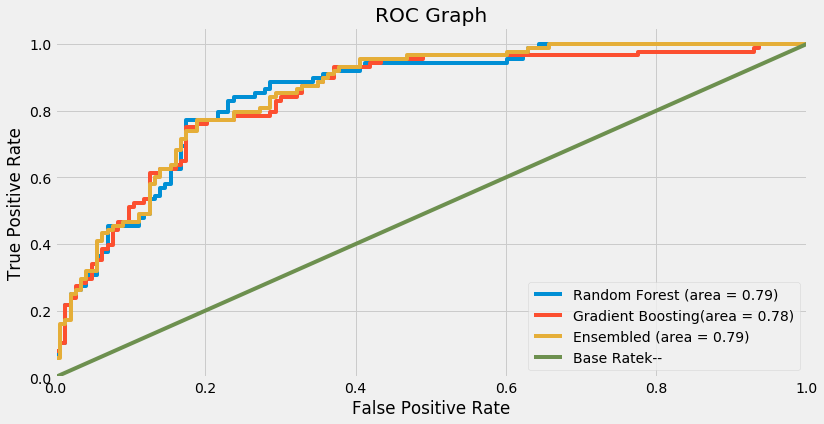

In [222]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_1, rf.predict_proba(X_test_1)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test_1, gbc.predict_proba(X_test_1)[:,1])
eclf_1_fpr, eclf_1_tpr, eclf_1_thresholds = roc_curve(y_test_1, eclf_1.predict_proba(X_test_1)[:,1])

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Ensembled GBC ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting(area = %0.2f)' % gbc_roc_auc)

# Plot Ensembled GBC and RF ROC
plt.plot(eclf_1_fpr, eclf_1_tpr, label='Ensembled (area = %0.2f)' % eclf_1_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


## Accuracy
## Random Forest- 78%
## Gradient Boosting - 79%
## Ensembled (Random Forest and Gradient Boosting)- 80%
## Random Forest and Gradient Boosting prove to be the best models for acheiving better classification accuracy.

NameError: name 'wd' is not defined